In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.utils import np_utils
from sklearn import metrics as ms
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import layers
np.random.seed(1000)

In [4]:
(X_train, y_train), (X_test, y_test) =cifar10.load_data() #Loading Data

In [5]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3) # resizing
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

In [6]:
#Dimension of the CIFAR10 dataset
print((X_train.shape,y_train.shape))
print((X_test.shape,y_test.shape))

((50000, 32, 32, 3), (50000, 1))
((10000, 32, 32, 3), (10000, 1))


In [7]:
number_of_classes = 10 #no.of classes in the dataset

Y_train = np_utils.to_categorical(y_train, number_of_classes) #One Hot Encoding Labels from Train and Test Dataset
Y_test = np_utils.to_categorical(y_test, number_of_classes)

y_train[0], Y_train[0]

(array([6], dtype=uint8),
 array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32))

In [8]:
#Alexnet Architecture
def AlexnetModel():
    alex_model = Sequential()
    alex_model.add(layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear",input_shape=X_train.shape[1:]))
    alex_model.add(Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu',padding='same'))
    alex_model.add(BatchNormalization())
    alex_model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
    alex_model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"))
    alex_model.add(BatchNormalization())
    alex_model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
    alex_model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
    alex_model.add(BatchNormalization())
    alex_model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
    alex_model.add(BatchNormalization())
    alex_model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
    alex_model.add(BatchNormalization())
    alex_model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
    alex_model.add(Flatten())
    alex_model.add(Dense(4096, activation='relu'))
    alex_model.add(Dropout(0.5))
    alex_model.add(Dense(4096, activation='relu'))
    alex_model.add(Dropout(0.5))
    alex_model.add(Dense(10, activation='softmax'))
    return alex_model

In [9]:
model = AlexnetModel()

In [10]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.001), metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 56, 56, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 56, 56, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 27, 27, 256)      1

In [10]:
history = model.fit(X_train, Y_train,batch_size=128,epochs=10,validation_data=(X_test, Y_test),shuffle=True)

Epoch 1/10
391/391 [==============================] - 1861s 5s/step - loss: 2.5478 - accuracy: 0.2687 - val_loss: 1.9450 - val_accuracy: 0.2964
Epoch 2/10
391/391 [==============================] - 1711s 4s/step - loss: 1.8538 - accuracy: 0.3742 - val_loss: 1.6582 - val_accuracy: 0.3999
Epoch 3/10
391/391 [==============================] - 1770s 5s/step - loss: 1.6522 - accuracy: 0.4212 - val_loss: 1.4757 - val_accuracy: 0.4632
Epoch 4/10
391/391 [==============================] - 1868s 5s/step - loss: 1.5254 - accuracy: 0.4606 - val_loss: 2.0454 - val_accuracy: 0.3260
Epoch 5/10
391/391 [==============================] - 1705s 4s/step - loss: 1.4285 - accuracy: 0.4936 - val_loss: 1.3728 - val_accuracy: 0.5062
Epoch 6/10
391/391 [==============================] - 1649s 4s/step - loss: 1.3455 - accuracy: 0.5212 - val_loss: 1.3402 - val_accuracy: 0.5236
Epoch 7/10
391/391 [==============================] - 1718s 4s/step - loss: 1.2831 - accuracy: 0.5428 - val_loss: 1.2252 - val_accuracy:

In [12]:
# Prediction
y_pred=model.predict(X_test)
y_true=np.argmax(y_pred,axis=1)

In [13]:
y_predicted_label=[np.argmax(i) for i in y_pred]

In [14]:
print ("Accuracy:", ms.accuracy_score(y_test,y_true))

Accuracy: 0.6196


In [15]:
cm=tf.math.confusion_matrix(labels=y_predicted_label,predictions=y_test)

Text(69.0, 0.5, 'Ture')

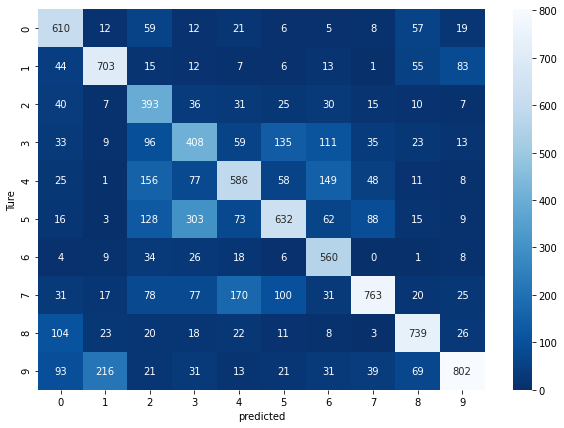

In [18]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d',cmap='Blues_r')
plt.xlabel('predicted')
plt.ylabel('Ture')
plt.title('CIFAR10 with Alexnet')

In [19]:
# evaluate the model
train_acc = model.evaluate(X_train, Y_train)
test_acc = model.evaluate(X_test, Y_test)
print('Train:',train_acc,'Test:', test_acc)


313/313 [==============================] - 78s 248ms/step - loss: 1.0782 - accuracy: 0.6196
Train: [1.0056226253509521, 0.6464200019836426] Test: [1.0782498121261597, 0.6195999979972839]


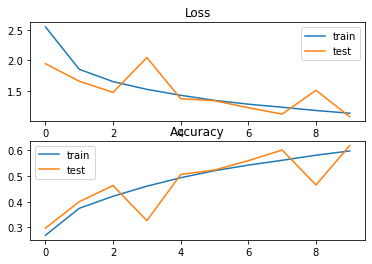

In [21]:
# plot loss during training
plt.subplot(2,1,1)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(2,1,2)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [22]:
from sklearn.metrics import classification_report

# predict 
pred = model.predict(X_test, batch_size = 32)
pred = np.argmax(pred, axis=1)
# label
y_test = np.argmax(Y_test, axis=1)

print(y_test.shape, pred.shape)
print(y_test[:5], pred[:5])

(10000,) (10000,)
[3 8 8 0 6] [3 1 8 0 4]


In [23]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.75      0.61      0.67      1000
           1       0.75      0.70      0.73      1000
           2       0.66      0.39      0.49      1000
           3       0.44      0.41      0.42      1000
           4       0.52      0.59      0.55      1000
           5       0.48      0.63      0.54      1000
           6       0.84      0.56      0.67      1000
           7       0.58      0.76      0.66      1000
           8       0.76      0.74      0.75      1000
           9       0.60      0.80      0.69      1000

    accuracy                           0.62     10000
   macro avg       0.64      0.62      0.62     10000
weighted avg       0.64      0.62      0.62     10000

